In [69]:
import os, torch, torchvision, random, copy
import pandas as pd
import numpy as np
import cv2
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans, DBSCAN

import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import models
from torch import optim

In [70]:
img = Image.open('./Train_Dev/training/DSC080454.JPG')
labels = []

with open(r'Train_Dev\train_labels\DSC080454.csv', 'r') as f:
    lines = f.readlines()
for line in lines:
    x, y = tuple(line.strip().split(','))
    labels.append((int(x),int(y)))

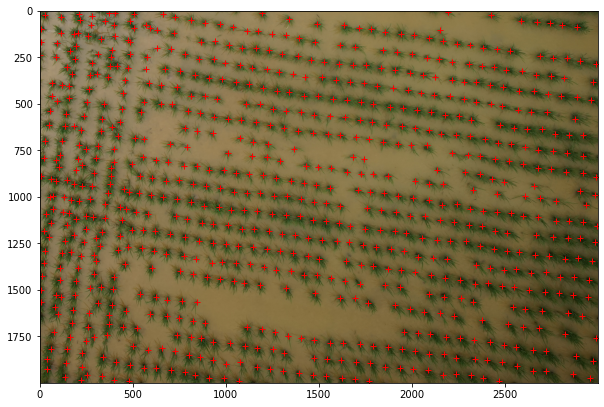

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(img)
for label in labels:
    plt.plot(*label, 'r+')

In [72]:
md = KMeans(n_clusters=3, random_state=0)

X = np.array(img).reshape(img.size[0] * img.size[1], 3)
print(X.shape)
md.fit(X)

# print(np.array(img).shape)

(6000000, 3)


KMeans(n_clusters=3, random_state=0)

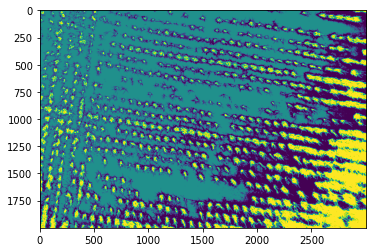

In [73]:
pred = md.predict(X)
pred = pred.reshape(img.size[1], img.size[0],1)
plt.imshow(pred)

In [74]:
a1, a2 = 150,300
b1, b2 = 450,600

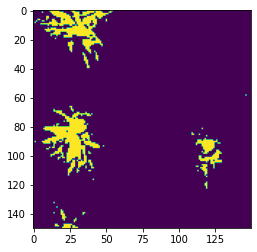

In [75]:
pred = np.where(pred != 2, 0, 1)
plt.imshow(pred[a1:a2, b1:b2])

In [81]:
# X = pred[0:150, 0:150]
X = pred[a1:a2, b1:b2]

X2 = []

for i in range(150):
    for j in range(150):
        if X[i,j] == 1:
            X2.append([i, j])

X2 = np.array(X2)

# md = DBSCAN(eps=4, min_samples=35)
md = KMeans(n_clusters=4, random_state=0)
md.fit(X2)

Z = md.predict(X2)
# Z = md.labels_
# print('# of clusters:',len(list(set(Z))))
# print('# of blue:', len(Z[Z==2]))
# print('# of dot:', len(Z))

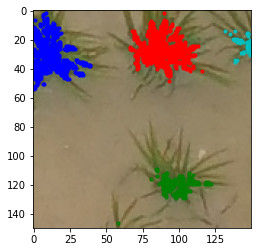

In [82]:
unique_labels = set(Z)
colors = ['r.', 'g.', 'b.', 'c.', 'y.', 'm.', 'k.', 'w.']

for x2, z in zip(X2, Z):
    plt.plot(x2[0], x2[1], colors[z])

plt.imshow(np.transpose(np.array(img)[a1:a2, b1:b2, :], (1,0,2)))

864.4050083567699

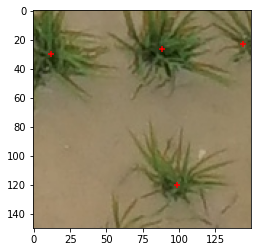

In [83]:
centers = []

ZX2 = np.hstack((X2, (Z.reshape(Z.shape[0], 1))))

# print(ZX2)
# zx2 = ZX2[ZX2[:,2] == i]
# print(zx2[:,0])

for i in range(np.max(Z)+1):
    
    zx2 = ZX2[ZX2[:,2] == i]
    centers.append((sum(zx2[:,0])/len(zx2), sum(zx2[:,1])/len(zx2)))

centers = np.array(centers)
plt.scatter(centers[:,0], centers[:,1], marker='+', c='#FF0000')
plt.imshow(np.transpose(np.array(img)[a1:a2, b1:b2, :], (1,0,2)))

KLoss(ZX2, centers)

In [59]:
loss = []

for K in range(1,10):
    X = pred[a1:a2, b1:b2]

    X2 = []

    for i in range(150):
        for j in range(150):
            if X[i,j] == 1:
                X2.append([i, j])

    X2 = np.array(X2)

    md = KMeans(n_clusters=K, random_state=0)
    md.fit(X2)

    Z = md.predict(X2)
    centers = []

    ZX2 = np.hstack((X2, (Z.reshape(Z.shape[0], 1))))

    # print(ZX2)
    # zx2 = ZX2[ZX2[:,2] == i]
    # print(zx2[:,0])

    for i in range(np.max(Z)+1):
        
        zx2 = ZX2[ZX2[:,2] == i]
        centers.append((sum(zx2[:,0])/len(zx2), sum(zx2[:,1])/len(zx2)))

    centers = np.array(centers)

    loss.append(KLoss(ZX2, centers))
print(loss)
print(np.argmin(loss) + 1)

[2241.7003995523723, 1807.6752593366766, 1730.2660018301017, 1316.551698708283, 867.4003061949142, 860.5932975526753, 879.7239146045454, 877.333646318417, 881.5077689109213]
6


In [47]:
def DoubleKMeansCluster(X, K=4):

    X2 = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i,j] == 1:
                X2.append([i, j])

    X2 = np.array(X2)
    md = KMeans(n_clusters=K, random_state=0)
    md.fit(X2)
    Z = md.predict(X2)

    centers = []

    ZX2 = np.hstack((X2, (Z.reshape(Z.shape[0], 1))))


    # print(ZX2)
    # zx2 = ZX2[ZX2[:,2] == i]
    # print(zx2[:,0])

    for i in range(np.max(Z)+1):
        
        zx2 = ZX2[ZX2[:,2] == i]
        centers.append((sum(zx2[:,0])/len(zx2), sum(zx2[:,1])/len(zx2)))


    centers = np.array(centers)
    
    loss = KLoss(ZX2, centers)

    return centers, loss

def KLoss(ZX2, centers):

    loss = []
    for i in range(np.max(ZX2[:,2])+1):

        zx2 = ZX2[ZX2[:,2] == i]
        loss.append(np.sqrt(np.sum(np.square(zx2[:,0]-centers[i,0]) + np.square(zx2[:,1]-centers[i,1]))))

    # return(sum(loss) + 50 * len(centers))

    return sum(loss)

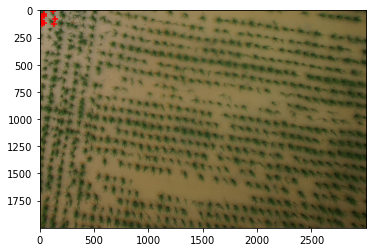

In [42]:
plt.imshow(img)
plt.scatter(centers[:,1], centers[:,0], marker='+', c='#FF0000')

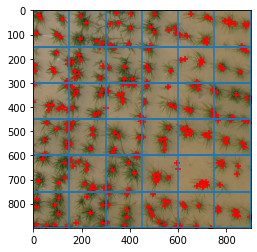

In [114]:
randomCenters = [] 

for i in range(0, 1000, 150):
    plt.vlines(i, ymin=0, ymax=900)
    for j in range(0, 1000, 150):
        pred_crop = pred[j:j+150, i:i+150]
        Loss, Centers = [], []

        cheat_labels = [[], []]
        for label in labels:
            if label[0] > i-10 and label[0] < i+160 and label[1] > j-10 and label[1] < j+160:
                cheat_labels[0].append(label[0])
                cheat_labels[1].append(label[1])

        # for K in range(1,10):
        #     centers, loss = DoubleKMeansCluster(pred_crop, K=K)
        #     Loss.append(loss)
        #     Centers.append(centers)
        # centers = Centers[np.argmin(Loss)]

        # cheating with ground truth
        # centers, loss = DoubleKMeansCluster(pred_crop, K=len(cheat_labels[0]))
        
        centers, loss = DoubleKMeansCluster(pred_crop, K=random.randint(5,10))
        randomCenters.append([centers[:,1]+i, centers[:,0]+j])

        plt.scatter(i+centers[:,1], j+centers[:,0], marker='+', c='#FF0000')
        # plt.scatter(cheat_labels[0], cheat_labels[1], marker='+', c='#00FF00', alpha=0.3)
        plt.hlines(j, xmin=0, xmax=900)
plt.imshow(img.crop((0,0,900,900)))


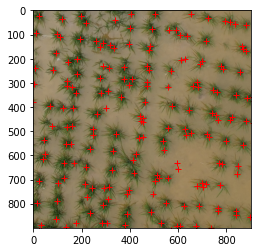

In [170]:
K3c = []

for rcs in randomCenters:
    minK = 5
    # print(rcs[0])
    # plt.plot(rcs[0], rcs[1], 'r+')
    X = np.vstack((np.array(rcs[0]), np.array(rcs[1]))).T
    md.fit(X)
    Z3 = md.predict(X)
    # plt.scatter(X[:,0], X[:,1])
    if X.shape[0] < minK:
        minK = X.shape[0]
    md = KMeans(n_clusters=minK, random_state=0)
    
    for uniq in list(set(Z3)):
        # print(Z3==uniq)
        xc = sum(X[Z3==uniq][:,0])/len(X[Z3==uniq])
        yc = sum(X[Z3==uniq][:,1])/len(X[Z3==uniq])
        plt.plot(xc, yc, 'r+')
        K3c.append((xc, yc))

plt.imshow(img.crop((0,0,900,900)))

In [171]:
i = 0
while(i != len(K3c)):
    rm_smaples=[]
    for j in range(i, len(K3c)):
        if (K3c[i][0]-K3c[j][0])**2 + (K3c[i][1]-K3c[j][1])**2 <= 300:
            rm_smaples.append(K3c[j])

    for rm_smaple in rm_smaples:
        K3c.remove(rm_smaple)
    
    i+=1

KeyboardInterrupt: 

In [ ]:
# gaussian = nn.Conv2d(in_channels=3, out_channels=3, )

X = np.array(img)
Igr = X[:, :, 1] - X[:, :, 0]
Igb = X[:, :, 1] - X[:, :, 2]
w1, w2 = 247, 30

print(Igb)

Igr = np.where(Igr>w1, 1, 0)
Igb = np.where(Igb>w2, 1, 0)

Bpr = np.where((Igr==1) & (Igb==1), 1, 0)

fig, ax = plt.subplots(1,3, figsize=(10, 20))
ax[0].imshow(Igr)
ax[1].imshow(Igb)
ax[2].imshow(Bpr)

X_t = np.zeros(shape=X.shape).astype(np.uint8)
for i in range(Bpr.shape[0]):
    for j in range(Bpr.shape[1]):
        if Bpr[i,j] == 1:
            X_t[i,j] = X[i,j]

In [ ]:
X_t = np.zeros(shape=X.shape).astype(np.uint8)
for i in range(Bpr.shape[0]):
    for j in range(Bpr.shape[1]):
        if Bpr[i,j] == 1:
            X_t[i,j] = X[i,j]

plt.imshow(X_t)

In [ ]:
plt.imshow(img)
print(Bpr)
print(np.max(Bpr))
plt.imshow(Bpr, cmap='jet', alpha=0.6)
# np.savetxt('n.txt', Bpr, fmt='%d')

In [ ]:
label_col = [[], [], []]
for label in labels:
    label_col[0].append(X[label[1], label[0], 0])
    label_col[1].append(X[label[1], label[0], 1])
    label_col[2].append(X[label[1], label[0], 2])

label_col = np.array(label_col)
gb = label_col[1] - label_col[2]

np.min(gb)
np.max(gb)
np.median(gb)

In [ ]:
X = np.array(img)
Igr = X[:, :, 1] - X[:, :, 0]
Igb = X[:, :, 1] - X[:, :, 2]
Ig = X[:,:,1]

w1, w2 = 248, 20
w3 = 100

Igr = np.where(Igr>w1, 1, 0)
Igb = np.where(Igb>w2, 1, 0)
Ig = np.where(Ig<w3, 1, 0)

# Bpr = np.where((Igr==1) & (Igb==1), 1, 0)
Bpr = np.where((Ig==1), 1, 0)

plt.imshow(X[0:250, 0:250])
plt.imshow(Bpr[0:250, 0:250], alpha=0.5, cmap='jet')

In [ ]:
class RiceDataset(Dataset):

    def __init__(self, filenames, labels, transform):

        self.filenames = filenames
        self.labels = labels
        self.transform = transform

    def __len__(self):

        return len(self.filenames)

    def __getitem__(self, idx):

        img = Image.open(self.filenames[idx])
        img = self.transform(img)

        load labels
        label = []
        with open(self.labels[idx], 'r') as f:
            lines = f.readlines()
        for line in lines:
            x, y = tuple(line.strip().split(','))
            label.append((x, y))


        return img, label

In [ ]:
img = Image.new(mode = '1', size=(224, 224))
draw = ImageDraw.Draw(img)
plt.imshow(img)

In [ ]:
batch_size = 4

train_transformer = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5], std=[0.5]),
])

test_transformer = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5], std=[0.5]),
])

def split_Train_Val_Data(data_dir = './Train_Dev'):

    training_dir = os.path.join(data_dir, 'training')
    labels_dir =  os.path.join(data_dir, 'train_labels')

    inputs, labels = [], []

    for filename in os.listdir(training_dir):
        inputs.append(os.path.join(training_dir, filename))
        labels.append(os.path.join(labels_dir, filename.split('.')[0]+'.csv'))

    inputs, labels = np.asarray(inputs), np.asarray(labels)

    train_inputs, test_inputs = [], []
    train_labels, test_labels = [], []

    np.random.seed(69)
    idxs = list(range(len(inputs)))
    np.random.shuffle(idxs)
    mid = int(len(idxs)*0.8)

    train_inputs.extend(inputs[idxs[:mid]])
    train_labels.extend(labels[idxs[:mid]])

    test_inputs.extend(inputs[idxs[mid:]])
    test_labels.extend(labels[idxs[mid:]])

    train_dataloader = DataLoader(RiceDataset(train_inputs, train_labels, train_transformer), batch_size = batch_size, shuffle = True)
    test_dataloader = DataLoader(RiceDataset(test_inputs, test_labels, test_transformer), batch_size = batch_size, shuffle = False)

    return train_dataloader, test_dataloader    

In [ ]:
train_dataloader, test_dataloader = split_Train_Val_Data()

In [ ]:
for img, label in train_dataloader:
    print(label)
    break